In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import math
%matplotlib inline
from scipy import stats
from sklearn import metrics


/home/recruit/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
salary = pd.read_csv('salary.csv')

In [3]:
salary.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


In [4]:
salary.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
salary         513 non-null float64
exprior        514 non-null int64
yearsworked    514 non-null int64
yearsrank      514 non-null int64
market         514 non-null float64
degree         514 non-null int64
otherqual      514 non-null int64
position       514 non-null int64
male           514 non-null int64
Field          514 non-null int64
yearsabs       514 non-null int64
dtypes: float64(2), int64(9)
memory usage: 44.2 KB


In [5]:
salary.describe().T

,count,mean,std,min,25%,50%,75%,max
salary,513.0,50863.220098,12685.132358,29000.00,40000.00,50096.00,60345.00,96156.00
exprior,514.0,2.926070,4.791397,0.00,0.00,0.50,4.00,25.00
yearsworked,514.0,12.852140,9.444695,0.00,4.00,12.00,22.00,41.00
yearsrank,514.0,7.052529,6.414771,0.00,2.00,5.00,12.00,28.00
market,514.0,0.948521,0.149380,0.71,0.84,0.92,1.02,1.33
degree,514.0,0.964981,0.184008,0.00,1.00,1.00,1.00,1.00
otherqual,514.0,0.044747,0.206950,0.00,0.00,0.00,0.00,1.00
position,514.0,2.132296,0.820075,1.00,1.00,2.00,3.00,3.00
male,514.0,0.750973,0.432871,0.00,1.00,1.00,1.00,1.00
Field,514.0,2.529183,1.127420,1.00,2.00,3.00,4.00,4.00


 ### There is one missing value in the salary column. We could either drop the missing value or replace it with the mean of the salary. In this case, we will drop the missing value from dataset because it is a small dataset,and this will not have significent impact.

In [6]:
clean_salary = salary.dropna()


In [7]:
clean_salary

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.00000,0,0,0,1.17,1,0,1,1,3,0
1,58000.00000,1,0,0,1.24,1,0,1,1,2,0
2,45500.00000,0,0,0,1.21,1,0,1,1,3,2
3,35782.00000,0,2,1,0.99,1,0,1,1,4,1
4,34731.00000,0,2,2,0.91,1,0,1,1,4,1
5,56000.00000,1,0,0,1.19,1,0,1,1,1,0
6,61008.00000,0,2,2,1.33,1,0,1,1,2,0
7,39986.00000,0,2,0,0.99,1,0,1,1,4,0
8,36308.00000,0,2,1,0.85,1,0,1,1,1,1
9,55000.00000,0,0,0,1.23,1,0,1,1,1,1


### We will now use a pairplot to see the relationships between different values as well as to see which columns have continuous values

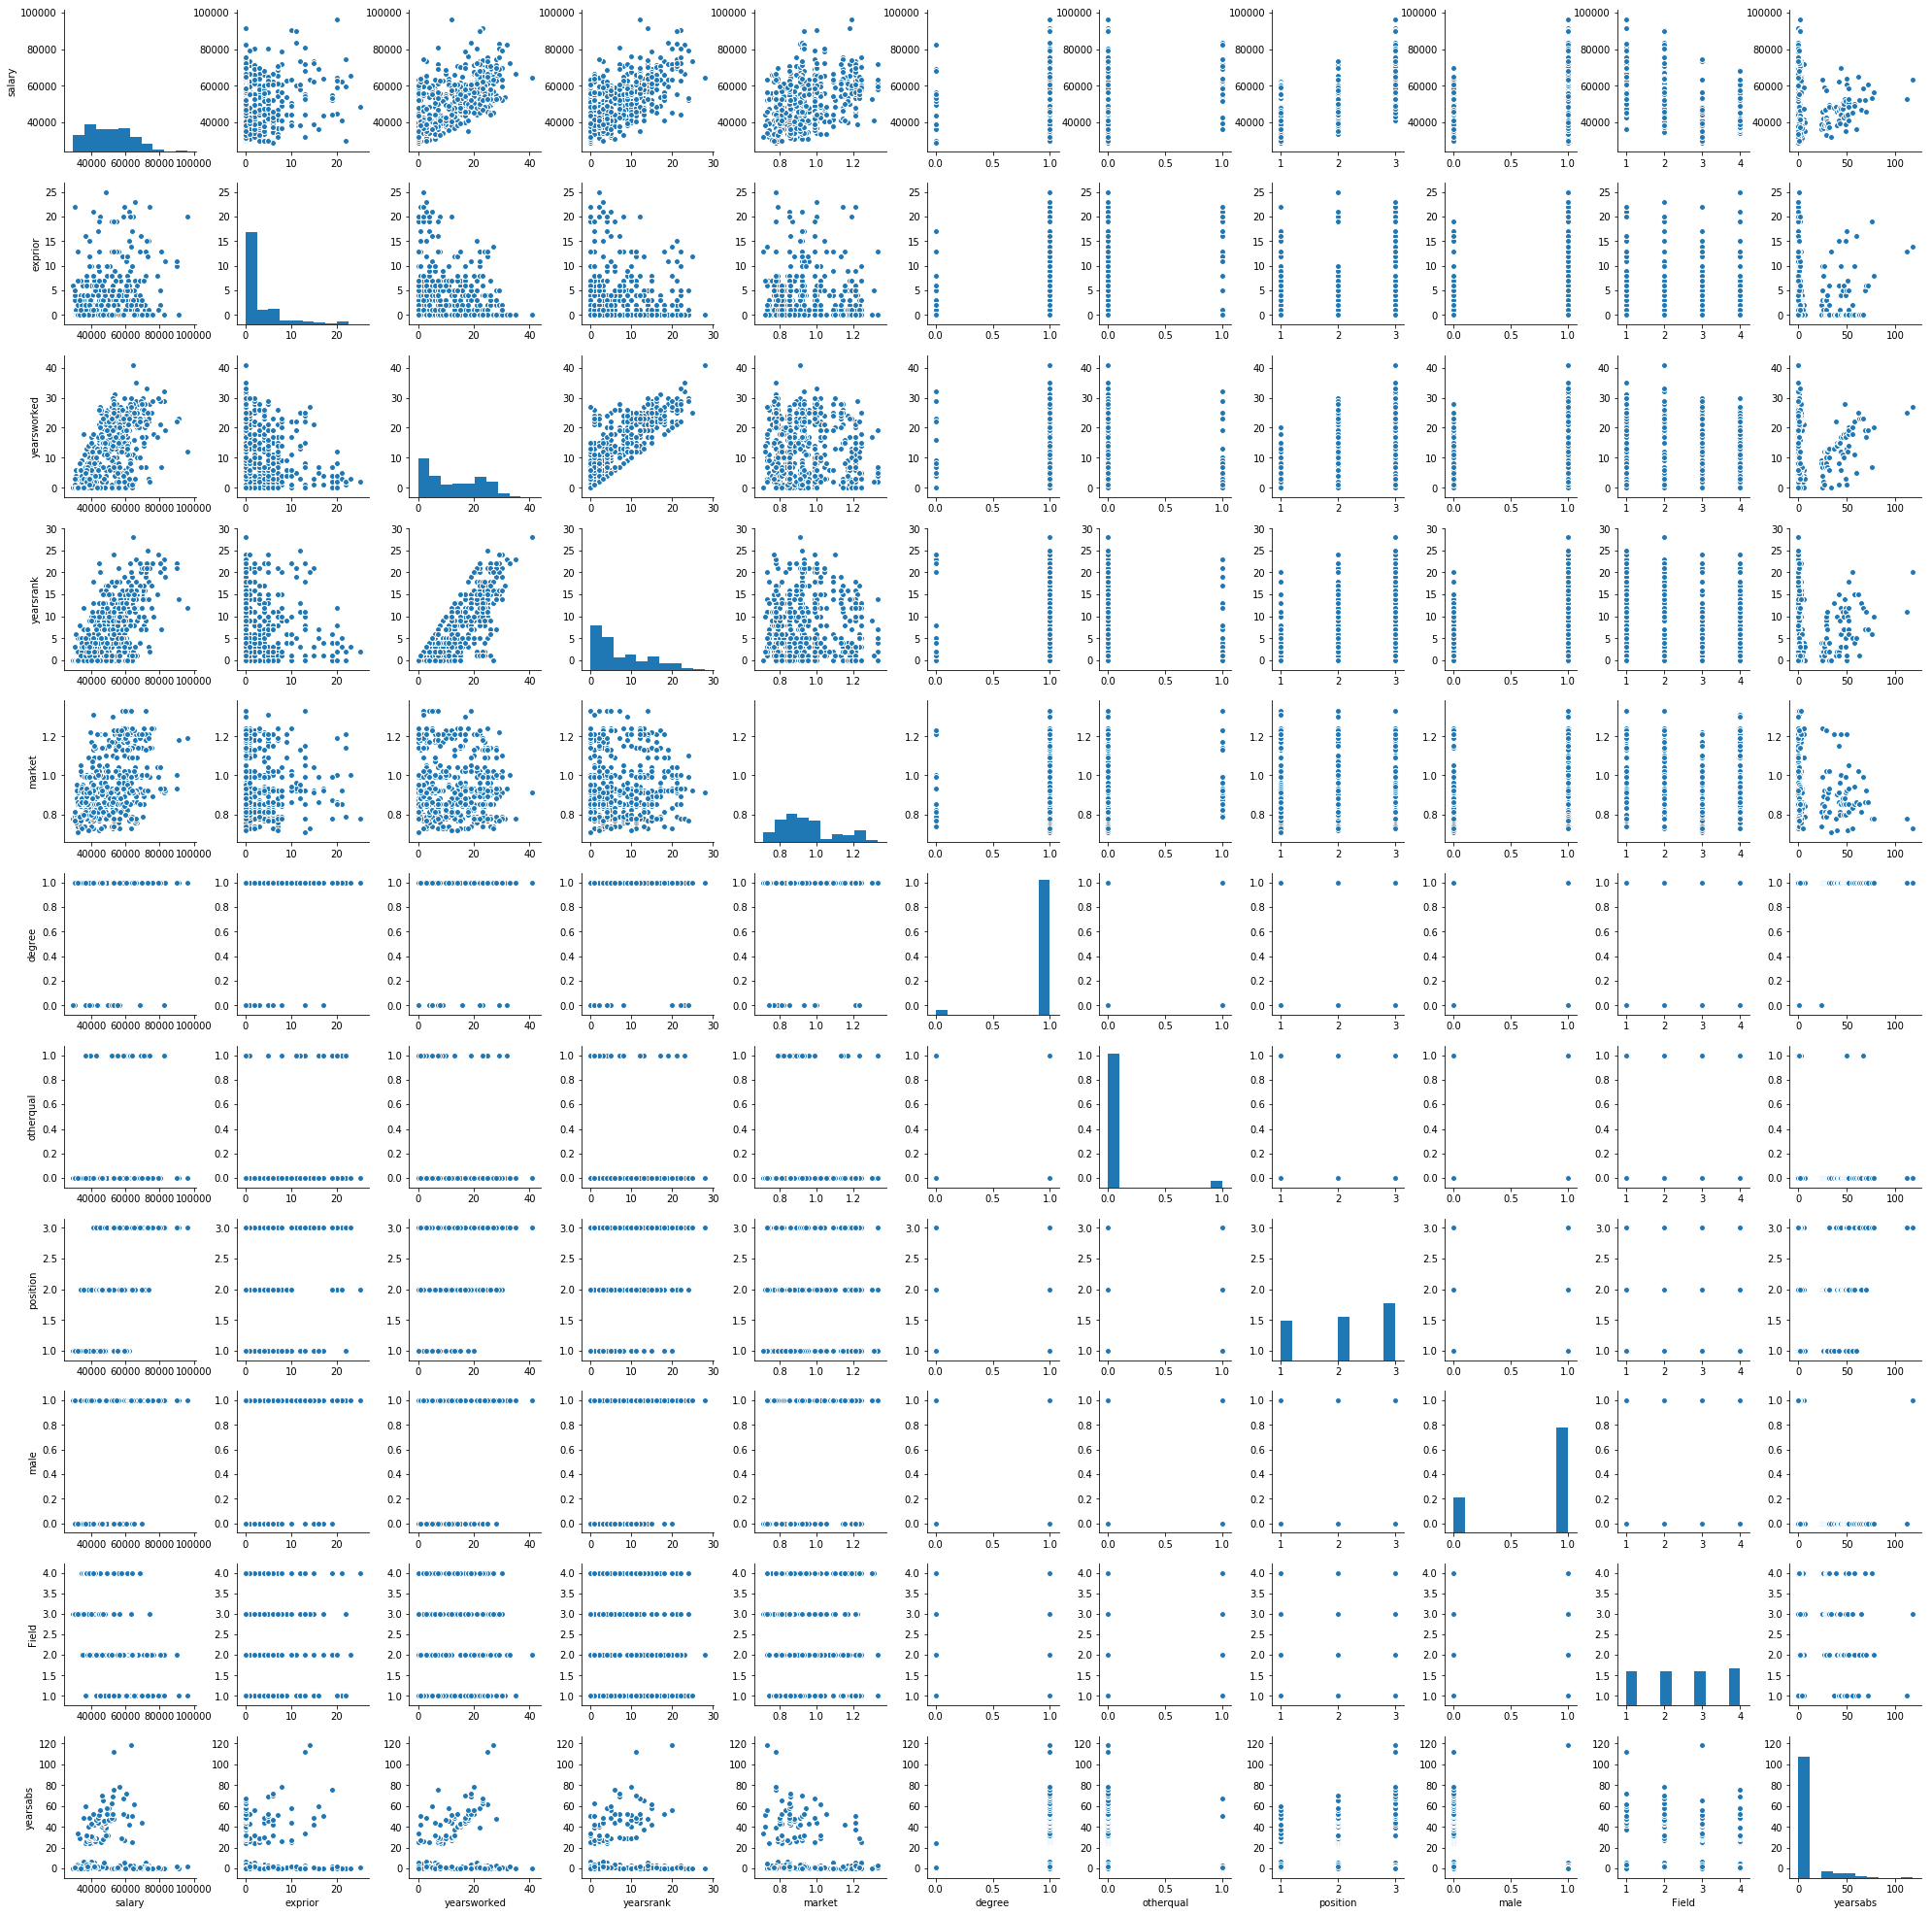

In [8]:

sns.pairplot(clean_salary)

### The null hypothesis states that there are no columns suitable to be used for modeling. There are no correlations between the target variable and other variables, the target variable being salary.¶

In [9]:
clean_salary.corr()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1.000000,0.119989,0.623589,0.610706,0.407214,0.044554,0.167137,0.702122,0.361564,-0.499316,-0.069630
exprior,0.119989,1.000000,-0.245788,-0.065893,-0.035202,-0.049165,0.264655,0.118031,0.047276,-0.046854,0.132022
yearsworked,0.623589,-0.245788,1.000000,0.813456,-0.070740,0.028122,-0.040157,0.746311,0.278286,-0.264208,0.056113
yearsrank,0.610706,-0.065893,0.813456,1.000000,-0.026869,0.006347,0.007232,0.484891,0.237397,-0.265620,0.035962
market,0.407214,-0.035202,-0.070740,-0.026869,1.000000,0.036456,0.021641,-0.013116,0.181401,-0.223887,-0.167177
degree,0.044554,-0.049165,0.028122,0.006347,0.036456,1.000000,-0.214654,0.043335,0.061419,-0.099077,0.029447
otherqual,0.167137,0.264655,-0.040157,0.007232,0.021641,-0.214654,1.000000,0.160941,0.016082,-0.076202,-0.017792
position,0.702122,0.118031,0.746311,0.484891,-0.013116,0.043335,0.160941,1.000000,0.317390,-0.292313,0.030521
male,0.361564,0.047276,0.278286,0.237397,0.181401,0.061419,0.016082,0.317390,1.000000,-0.130599,-0.622058
Field,-0.499316,-0.046854,-0.264208,-0.265620,-0.223887,-0.099077,-0.076202,-0.292313,-0.130599,1.000000,0.000778


### Upon inspection, we see that there is a correlation with three columns. The highest correlation is between salary and position. However, we cannot use the position for predicting because it is not a continuous value. Therefore we will use the yearsworked column because it has the second-highest correlation of 0.62 and it is a continuous value. This observation disproves the null hypothesis and causes us to accept the alternative hypothesis

In [10]:
col = ['exprior','yearsworked','yearsrank','market','degree','otherqual','position','male','Field','yearsabs']

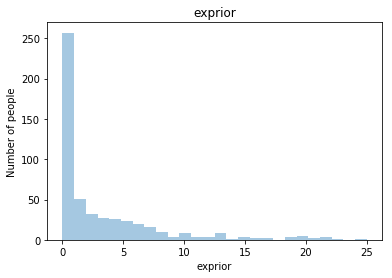

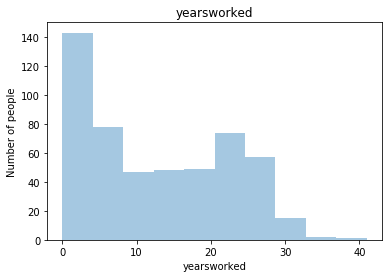

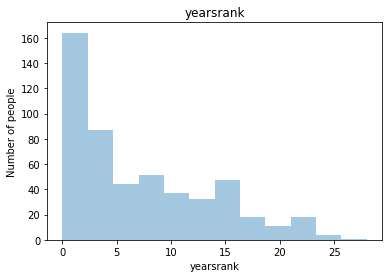

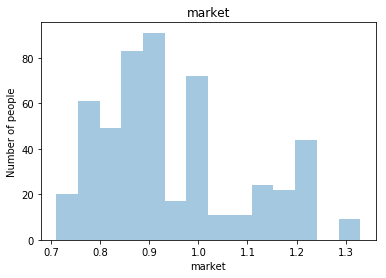

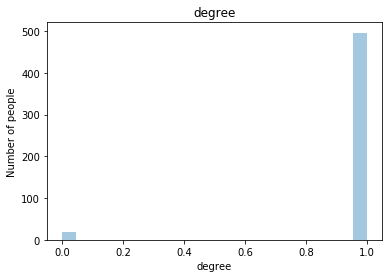

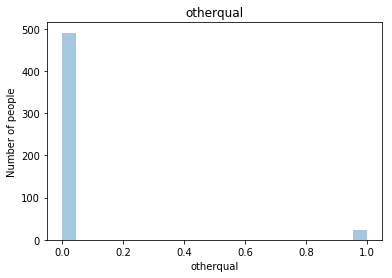

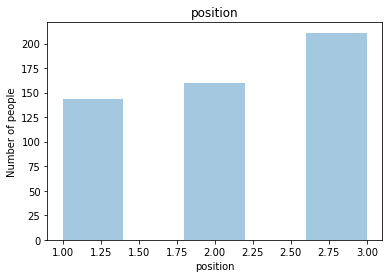

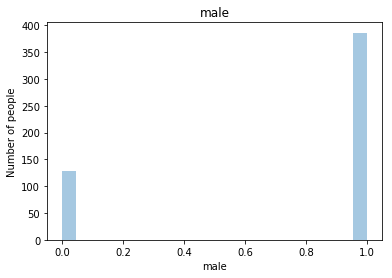

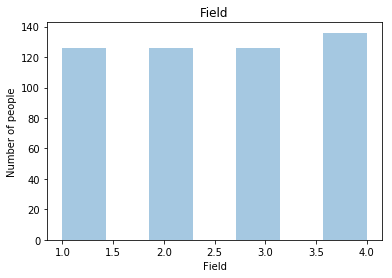

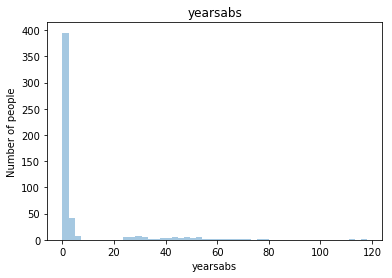

In [11]:

for i in col:
    sns.distplot(salary[i],kde=False)
    plt.title(f'{i}')
    plt.ylabel('Number of people')
    plt.show()

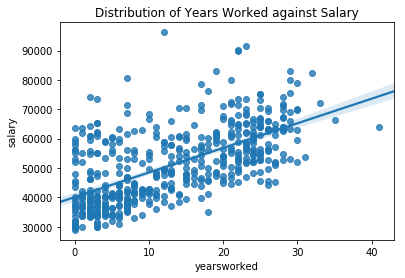

In [12]:
sns.regplot(salary['yearsworked'],salary['salary'])
plt.title('Distribution of Years Worked against Salary')
plt.show()

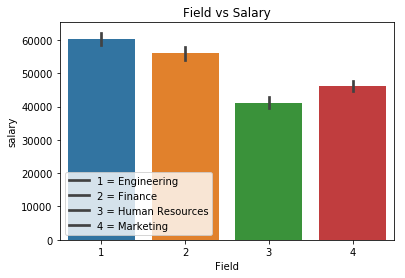

In [13]:
sns.barplot(clean_salary['Field'],clean_salary['salary'])
plt.title('Field vs Salary')
labels = ['1 = Engineering','2 = Finance','3 = Human Resources','4 = Marketing']
plt.legend(labels)
plt.show()

In [14]:
stats.pearsonr(clean_salary['salary'], clean_salary['Field'])


(-0.49931605356779035, 1.06134351846618e-33)

### One-hot encoding the variable Field into dummy variables using HR as reference. The purpose of this is so we can use Field to model. Discrete values cannot be modelled but by one-hot encoding them we can transform them into a usable form.

In [15]:
df_dummy = pd.get_dummies(salary,prefix_sep='_',columns=['Field'],drop_first=True)

In [16]:
df_dummy=df_dummy.dropna()

df_dummy

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,yearsabs,Field_2,Field_3,Field_4
0,53000.00000,0,0,0,1.17,1,0,1,1,0,0,1,0
1,58000.00000,1,0,0,1.24,1,0,1,1,0,1,0,0
2,45500.00000,0,0,0,1.21,1,0,1,1,2,0,1,0
3,35782.00000,0,2,1,0.99,1,0,1,1,1,0,0,1
4,34731.00000,0,2,2,0.91,1,0,1,1,1,0,0,1
5,56000.00000,1,0,0,1.19,1,0,1,1,0,0,0,0
6,61008.00000,0,2,2,1.33,1,0,1,1,0,1,0,0
7,39986.00000,0,2,0,0.99,1,0,1,1,0,0,0,1
8,36308.00000,0,2,1,0.85,1,0,1,1,1,0,0,0
9,55000.00000,0,0,0,1.23,1,0,1,1,1,0,0,0


In [17]:
df_dummy.corr()


,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,yearsabs,Field_2,Field_3,Field_4
salary,1.000000,0.119989,0.623589,0.610706,0.407214,0.044554,0.167137,0.702122,0.361564,-0.069630,0.231626,-0.435815,-0.216884
exprior,0.119989,1.000000,-0.245788,-0.065893,-0.035202,-0.049165,0.264655,0.118031,0.047276,0.132022,0.001509,-0.041037,-0.013669
yearsworked,0.623589,-0.245788,1.000000,0.813456,-0.070740,0.028122,-0.040157,0.746311,0.278286,0.056113,0.151929,-0.267442,-0.100326
yearsrank,0.610706,-0.065893,0.813456,1.000000,-0.026869,0.006347,0.007232,0.484891,0.237397,0.035962,0.170245,-0.241413,-0.124460
market,0.407214,-0.035202,-0.070740,-0.026869,1.000000,0.036456,0.021641,-0.013116,0.181401,-0.167177,0.120408,-0.250358,-0.066834
degree,0.044554,-0.049165,0.028122,0.006347,0.036456,1.000000,-0.214654,0.043335,0.061419,0.029447,0.034974,-0.063472,-0.054448
otherqual,0.167137,0.264655,-0.040157,0.007232,0.021641,-0.214654,1.000000,0.160941,0.016082,-0.017792,0.095212,-0.079855,-0.043909
position,0.702122,0.118031,0.746311,0.484891,-0.013116,0.043335,0.160941,1.000000,0.317390,0.030521,0.141211,-0.306571,-0.095280
male,0.361564,0.047276,0.278286,0.237397,0.181401,0.061419,0.016082,0.317390,1.000000,-0.622058,0.025520,-0.162851,-0.013460
yearsabs,-0.069630,0.132022,0.056113,0.035962,-0.167177,0.029447,-0.017792,0.030521,-0.622058,1.000000,0.029187,0.011471,-0.016323


### There is no multicollinearity in this set because our two predictors: 'yearsworked' and 'Field' are not correlated
### Splitting the dataset into the train set and test set. 75% of the data will go into the training set and the remaining 25% will be used for testing

In [18]:
x = df_dummy[['yearsworked','Field_3']]
y = clean_salary['salary']
x = sm.add_constant(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=101)

model = sm.OLS(y_train,x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     143.4
Date:                Sat, 28 Mar 2020   Prob (F-statistic):           3.68e-47
Time:                        00:41:45   Log-Likelihood:                -4057.1
No. Observations:                 384   AIC:                             8120.
Df Residuals:                     381   BIC:                             8132.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          4.4e+04    925.429     47.541      0.000    4.22e+04    4.58e+04
yearsworked   700.3799     52.462     13.350      0.000     597.229     803.530
Field_3     -8446.9585   1152.505     -7.329      0.000   -1.07e+04   -6180.891
==============================================================================
Omnibus:                       65.064   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.886
Skew:                           1.002   Prob(JB):                     3.74e-24
Kurtosis:                       4.650   Cond. No.                         42.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The R squared value tells the quality of the regression model describing relationships between dependent and independent variables in a model. The R squared value for this model is 0.430 so the model is approximately 43.0% accurate. The p-value of this model is 0.000 so it is statistically significant.¶
### The confidence interval is an estimate interval that might contain the value of the unstandardized coefficient. In this model, the coefficient is 700.15 for 'yearsworked'. This means that for every unit, there will be an increase of 700.15.
### Predicting the salary using the train set

In [19]:
prediction = model.predict(x_train)


In [20]:
df = pd.DataFrame(prediction)


### Creating a dataframe for the predicted values¶

In [21]:
df.rename(columns={0:'train_set_prediction'},inplace=True)

In [22]:
df

,train_set_prediction
201,55202.264851
284,61505.683838
176,55902.644738
235,59404.544176
223,54501.884963
398,43996.186651
53,47498.086089
242,59404.544176
161,54501.884963
51,35549.228174


### Concatenating the two dataframes in order to compare the actual salaries and the predictions.

In [23]:

concatenated = pd.concat([y_train,x_train,df],axis=1)

In [24]:
concatenated

,salary,const,yearsworked,Field_3,train_set_prediction
201,53010.00000,1.0,16,0,55202.264851
284,63800.00000,1.0,25,0,61505.683838
176,71605.00000,1.0,17,0,55902.644738
235,64854.31250,1.0,22,0,59404.544176
223,70434.00000,1.0,15,0,54501.884963
398,56000.00000,1.0,0,0,43996.186651
53,34157.00000,1.0,5,0,47498.086089
242,61316.00000,1.0,22,0,59404.544176
161,49923.00000,1.0,15,0,54501.884963
51,40000.00000,1.0,0,1,35549.228174


### Based on the above, we can see that the predictions are not far off from the actual salaries. We can safely say that 'yearsworked' and 'Field' can somewhat predict how much an individual is going to earn.

In [25]:

residual = sm.regression.linear_model.RegressionResults.resid(model)

In [26]:
fitted_values = sm.regression.linear_model.RegressionResults.fittedvalues(model)


### Plotting the residuals¶


Text(0.5,1,'Residual Plot of Actual Salary vs Predicted Salary')

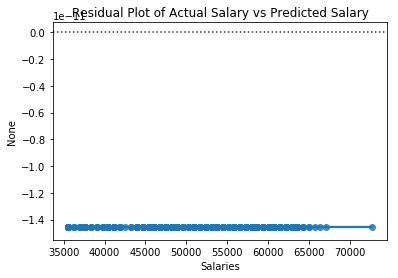

In [27]:
sns.residplot(fitted_values,prediction,lowess=True)
plt.xlabel('Salaries')
plt.title('Residual Plot of Actual Salary vs Predicted Salary')

 ### Predicting salary using the test set

In [28]:
test = model.predict(x_test)


### Creating a dataframe of the predicted salaries from the test set

In [29]:
df_test = pd.DataFrame(test)
df_test.rename(columns={0:'test_prediction'},inplace=True)

In [30]:

df_test

,test_prediction
405,44696.566539
313,53101.125189
370,64307.203388
305,60805.303951
417,38350.747724
273,60104.924063
4,45396.946426
490,53101.125189
18,37650.367837
81,37650.367837


In [31]:
predictions = sm.OLS(y_test,x_test).fit()

In [32]:
predictions.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     82.48
Date:                Sat, 28 Mar 2020   Prob (F-statistic):           1.26e-23
Time:                        00:41:45   Log-Likelihood:                -1354.7
No. Observations:                 129   AIC:                             2715.
Df Residuals:                     126   BIC:                             2724.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.214e+04   1599.503     26.346      0.000     3.9e+04    4.53e+04
yearsworked   832.9473     89.929      9.262      0.000     654.981    1010.914
Field_3     -8277.6335   1957.477     -4.229      0.000   -1.22e+04   -4403.843
==============================================================================
Omnibus:                       15.401   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.050
Skew:                           0.856   Prob(JB):                     0.000198
Kurtosis:                       3.494   Cond. No.                         45.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

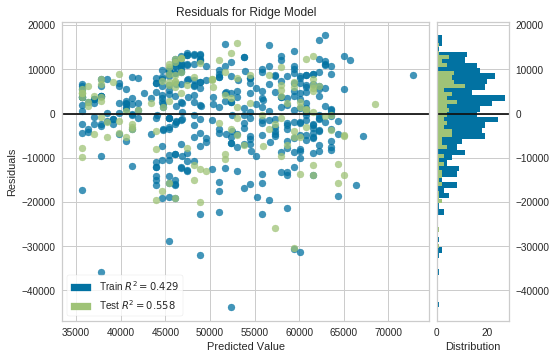

In [33]:

from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import Ridge

model1 = Ridge()
visualizer = ResidualsPlot(model1)

visualizer.fit(x_train, y_train)  
visualizer.score(x_test, y_test)  
visualizer.show()

In [34]:

from sklearn import metrics
print('TRAIN RMSE:', np.sqrt(metrics.mean_squared_error(y_train, model.predict(x_train))))
print('TEST RMSE:', np.sqrt(metrics.mean_squared_error(y_test, model.predict(x_test))))

TRAIN RMSE: 9380.30477689
TEST RMSE: 8889.17142548


###  The test RMSE is slightly bigger than the train RMSE. This shows that the model is slightly overfitted